# <center>GRIP Internship - TASK 1 </center>

## <center> Prediction using Supervised ML
<p align="right"> <b><i>Author: Ashik Srinivas</b></i>

## Getting Started

The dataset contains student information with two attributes namely "Hours" and "Scores".<br>
<i>Attribute information:</i>
- Hours - No of hours studied for a day
- Scores - Scores attained<br>

<b>TASKS:</b> <br> 
- Predict the percentage of an student based on the no. of study hours<br>
- What will be predicted score if a student studies for 9.25 hrs/day?

In [2]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading dataset
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.columns.values

array(['Hours', 'Scores'], dtype=object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Observations:
- The dataset consists of 25 rows and 2 columns
- There are no missing values in the dataset
- There are no duplicated values either
- There are only two attributes namely "Hours" and "Scores"
- 75% of students have studied for atleast 7.5 Hours 
- Only 25% of students have got Scores more than 75 and the maximum marks attained was 95
- On average, a student studies for about 5 hours and scores 51 marks

## Data Visualization & Analysis

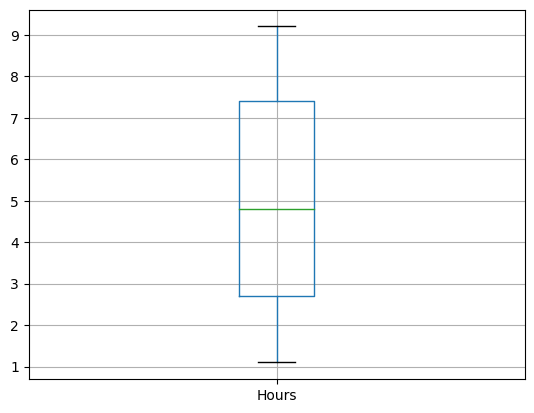

In [10]:
data.boxplot(['Hours']);

In [11]:
data.boxplot(['Scores']);

- There are no outliers present in both attributes

In [12]:
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(data['Hours'], data['Scores'], "*", color = 'red');

- As the hours spend studying increases, the scores also increase
- There is a positive linear relationship between the two attributes

In [13]:
sns.distplot(data['Scores'], bins=10);

- "Scores" feature is almost normally distributed with skew in the positive side, so we can go forward and perform linear regression model to predict the values

In [14]:
sns.heatmap(data.corr(), annot=True);

- Both attributes are positively correlated to each other

## Data Preprocessing

In [15]:
# splitting the dataset into X and Y
x = data.drop(['Scores'], axis=1)
y = data['Scores']

In [16]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

## Model Building

In [17]:
# linear regression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Model Prediction

In [18]:
y_pred = model.predict(x_test)

In [19]:
model.score(x_test, y_test)

0.9487647340257012

In [20]:
# evaluating train and test scores
print('Training Score: ', model.score(x_train, y_train))
print('Testing score: ', model.score(x_test, y_test))

Training Score:  0.9536486503889446
Testing score:  0.9487647340257012


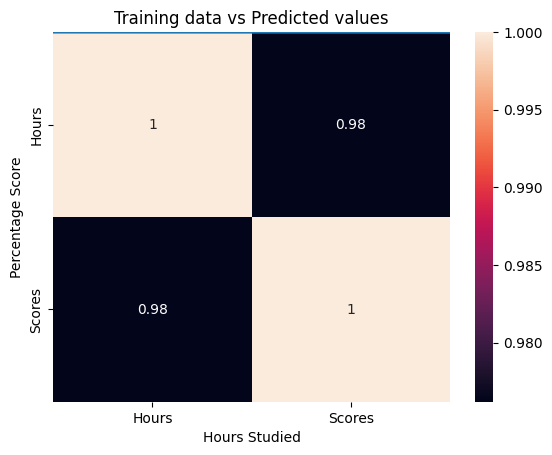

In [21]:
# comparing training data and predicted values using scatter plot
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train), color = 'red');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title("Training data vs Predicted values")
plt.show()

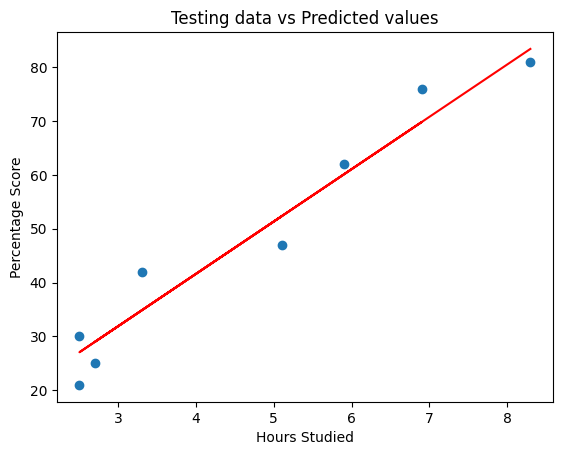

In [22]:
# comparing test data and predicted values using scatter plot
plt.scatter(x_test, y_test)
plt.plot(x_test, model.predict(x_test), color = 'red');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title("Testing data vs Predicted values")
plt.show()

In [23]:
# mean absolute error
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))

MAE:  4.499999999999998


In [24]:
# root mean square error
print('RMSE: ', metrics.mean_squared_error(y_test, y_pred))

RMSE:  23.61945761415174


In [25]:
# goodness of fit r2
print('r2 Score: ', metrics.r2_score(y_test, y_pred))

r2 Score:  0.9487647340257012


The above metrics are quite evident that linear regression model performs well for the dataset with low error scores and good accuracy rate. Thus, we can finalize linear regression as our model.

### Objective:<br>
#### What will be predicted score if a student study for 9.25 hrs in a day?

In [26]:
study_hours = 9.25
prediction = model.predict([[study_hours]])
print(prediction)

[92.61670034]


#### Result - If a student studies for 9.25 hours a day, he/she might score about 92 marks